Usar transformações, segmentação e filtros de imagem para tentar medir o tamanho das moedas no papel.

In [1]:
from imutils import contours
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

Imagem Original


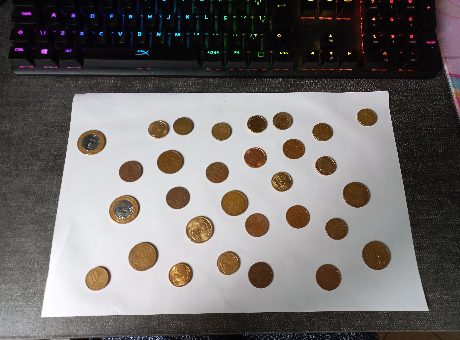

In [4]:
WIDTH = 460
HEIGHT = 340

image = cv2.imread("coins.jpg")
image = cv2.resize(image, (460, 340))

print("Imagem Original")
cv2_imshow(image)

Use métodos do opencv para achar e aplicar uma transformação que leve os os cantos do papel para os cantos da imagem. Depois, converta a imagem para o cinza.

In [ ]:
corners = [[76, 96], [388, 90], [40, 316], [430, 311]]

# tranformação e cinza

Use o algoritmo de Canny para detectar as arestas.

In [ ]:
# canny

Utilize threshold para segmentar as moedas. Experimente também erode e dilate para tentar melhorar o resultado.

In [ ]:
# threshold

Use o algoritmo de watershed para detectar as arestas

In [ ]:
# watershed

In [ ]:
result = None # coloque aqui o resultado final de cada metodo e avalie o resultado

cs = cv2.findContours(result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cs = imutils.grab_contours(cs)

(cs, _) = contours.sort_contours(cs)
COINSIZE = 500
mmPerPixel = None

orig = image.copy()
for c in cs:
    if cv2.contourArea(c) < 100:
        continue
    (x,y),radius = cv2.minEnclosingCircle(c)
    cv2.circle(orig,(int(x),int(y)),int(radius),(0,255,0),2)

    if mmPerPixel is None:
        mmPerPixel = COINSIZE / radius

    cv2.putText(orig, "{:.1f}mm".format(mmPerPixel * radius), (int(x - radius), int(y - radius)), cv2.FONT_HERSHEY_SIMPLEX, 0.36, (255, 255, 255), 1)

cv2_imshow(orig)